In [30]:
from __future__ import division
from math import sin, cos, tan, sqrt, pi, atan
import numpy as np

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

**1. Aufgabe (1 Punkte)**

In [3]:
def wheel_rot_vec(d_0, g_0, camber):
    '''
    Calculate the unit vector of the wheel's rotation axis:
    
    :param d_0 - toe angle
    if flag is 1
    :param g_0 - camber angle
    else
    :param g_0 - is hat gamma_0
    '''
    if camber is 1:
        e_yR = np.array([sin(d_0)*cos(g_0), cos(d_0)*cos(g_0), -sin(g_0)])
    else:
        e_yR = (1/sqrt(tan(d_0)**2 + 1 + tan(g_0)**2))*np.array([tan(d_0), 1, -tan(g_0)])
    
    return e_yR

**Solution:**

Die Komponenten des Einheitsvektors $e_{yR}$, der die Richtung der Raddrehachse angibt:

In [4]:
# Data
d_0 = 0.5*pi/180   # Toe angle
g_0 = -0.8*pi/180  # Hat gamma_0 angle

camber = 0  # Because we use the hat gamma_0 angle

e_yR = wheel_rot_vec(d_0, g_0, camber)

print('eyR:{0}'.format(e_yR))

eyR:[ 0.0087  0.9999  0.0140]


**2. Aufgabe (2 Punkte)**

**Solution:**

Einheitsvektoren $e_{x,0}$ und $e_{y,0}$:

In [5]:
e_yR_0 = [-0.2588, 0.9658, -0.0175]
e_n_0  = [0, -0.0523, 0.9986]

# ex = eyR * en
e_x_0 = np.cross(e_yR_0, e_n_0)
e_x_0 /= np.linalg.norm(e_x_0)

print('ex,0:{0}'.format(e_x_0))

# ey = en * ex
e_y_0 = np.cross(e_n_0, e_x_0)
e_y_0 /= np.linalg.norm(e_y_0)

print('ey,0:{0}'.format(e_y_0))

ex,0:[ 0.9658  0.2590  0.0136]
ey,0:[-0.2594  0.9644  0.0505]


**3. Aufgabe (2 Punkte)**

**Solution:**

Steifigkeit des Stabilisators:

$$
c_{arb} = i_{arb}^2 \frac{\pi}{32} \frac{GD^4}{a^2b}
$$

In [9]:
# Daten der Steifigkeit des Stabilisators
a = 250    # [mm]
b = 750    # [mm]
D = 20     # [mm]

iarb = 2/3
G = 85000  # [N/mm^2]

carb = (iarb**2)*(pi/32)*((G*D**4)/(a**2*b))
print('Steifigkeit des Stabilisators [N/mm]:{0:.2f}'.format(carb))

Steifigkeit des Stabilisators [N/mm]:12.66


**4. Aufgabe (3 Punkte)**

**Solution:**

The maximum deceleration is limit by the coefficient of friction $\dot{v} = -\mu g$. From the equation of the problem 2 of list 1, we can calculate the longitudinal maximum longitudinal forces of each wheel as:

\begin{eqnarray*}
F_{x1} & = & \mu (mg\frac{a_{2}}{a}-\frac{h}{a}m\dot{v})\\
F_{x2} & = & \mu (mg\frac{a_{1}}{a}+\frac{h}{a}m\dot{v})
\end{eqnarray*}

In [2]:
u = 0.4
m = 180
g = 9.81
a1 = 0.65
a2 = 0.55
h = 0.75

Fx1 = u*(m*g*a2/(a1+a2) - h*m*(-u*g)/(a1+a2))
Fx2 = u*(m*g*a1/(a1+a2) + h*m*(-u*g)/(a1+a2))

print('Fx1 [N]:{0:.2f}'.format(-Fx1))
print('Fx2 [N]:{0:.2f}'.format(-Fx2))

Fx1 [N]:-500.31
Fx2 [N]:-206.01


**5. Aufgabe (6 Punkte)**

**Solution:**

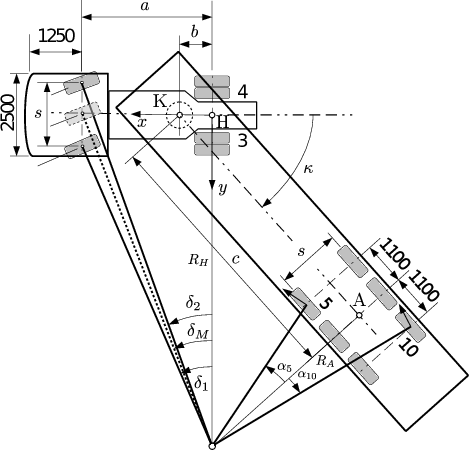

In [15]:
from wand.image import Image as WImage
img = WImage(filename='camion.pdf')
img

In this figure we can calculate the $\delta_1$, $\delta_2$ using the Ackerman geometry as:

$$\tan(\delta_{1}) = \frac{a}{R_{H}-s/2}$$
$$\tan(\delta_{2}) = \frac{a}{R_{H}+s/2}$$
$$\tan(\delta_{M}) = \frac{a}{R_{H}}$$

In [18]:
a = 3200
b = 500
c = 6500
s = 2100
delta_1 = 25*pi/180

RH = a/tan(delta_1) + s/2
print('RH [mm]:{0:.2f}'.format(RH))

delta_2 = atan(a/(RH+s/2))*180/pi
print('delta_2 [deg]:{0:.2f}'.format(delta_2))

RH [mm]:7912.42
delta_2 [deg]:19.65


For the angle $\kappa$ we can use the equation (obtained from the figure):

$$\sin(\kappa) = \frac{c\cos(\kappa)-b}{R_{H}\cos(\kappa) - b\sin(\kappa)}$$

In [34]:
from __future__ import division
import sympy as spy
from sympy import Symbol
x = Symbol('x')

eq = spy.sin(x) - (c*spy.cos(x)-b)/(RH*spy.cos(x)-b*spy.sin(x))
xsol = solve(eq, x)
xsol

[-1.57079632679490, 0.898054717173097, 1.57079632679490, 2.11732220944064]

For this values we can choose an angle between [0,90]deg, so:

$$\kappa = 0.898054717173097 \, \textrm{[rad]}$$ 

In [37]:
k = xsol[1]*180/pi
print('kappa [deg]:{0:.2f}'.format(k))

kappa [deg]:51.45


For the angle $R_{A}$ we can use the equation (obtained from the figure):

$$ R_{A} = (R_{H}-b\tan(\kappa))\cos(\kappa) $$

In [42]:
k = k*pi/180
RA = (RH-b*tan(k))*cos(k)
print('RA [mm]:{0:.2f}'.format(RA))

RA [mm]:4539.43


The angles $\alpha_5$ and $\alpha_{10}$ are easy obtained by:

$$ \tan(\alpha_5) = \frac{1100}{R_{A}-s/2} $$
$$ \tan(\alpha_{10}) = \frac{1100}{R_{A}+s/2} $$

In [43]:
alp_5 = atan(1100/(RA-s/2))
alp_10 = atan(1100/(RA+s/2))
print('alpha_5 [deg]:{0:.2f}'.format(alp_5*180/pi))
print('alpha_10 [deg]:{0:.2f}'.format(alp_10*180/pi))

alpha_5 [deg]:17.50
alpha_10 [deg]:11.13
